In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from glob import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
ROOT_RESULT_DIR = "./data/human_label_experiments/" # @param {type:"string"}


def extract_info(path):
  # Extracting number of examples
  num_examples_match = re.search(r"(-?\d+)SHOTS", path)
  if num_examples_match:
    num_examples = int(num_examples_match.group(1))
    if num_examples == -1:
      num_examples = "All"
  else:
    num_examples = None

  # Extracting method for selecting examples
  method_match = re.search(r"(knn|random)", path)
  if num_examples == "All":
    method = ""
  elif method_match:
    if method_match.group(1) == "knn":
      method = "KNN "
    else:
      method = "Random "
  else:
    method = None

  # Checking if agent or non-agent
  agent_match = re.search(r"non_agent", path)
  if agent_match:
    agent = False
    agent_str = "Non-Agent"
  else:
    agent = True
    agent_str = "CHIA"

  if "non_search" in path:
    search_str = " - No Search"

  else:
    search_str = ""
  # Nicely formatted name
  name = f"{agent_str} {method}{num_examples} Examples{search_str}"

  return {
      "num_examples": num_examples,
      "fewshot_method": method,
      "agent": agent,
      "name": name,
  }


def load_all_results(path):
  all_results = []
  for f in glob(path + "*.json"):
    df = pd.read_json(f,orient="records")
    df["origin"] = f
    df["persona"]  = f.split("_")[-1]
    # df = df.drop_duplicates(subset=["question"])
    metadata = pd.DataFrame(df["origin"].dropna().map(extract_info).tolist(), index=df.index)
    df = df.merge(metadata,left_index=True, right_index=True)
    all_results.append(df)
  return pd.concat(all_results)


results_df = load_all_results(ROOT_RESULT_DIR)
results_df = results_df.rename(columns={"uuid": "id"})


In [3]:
# @title Raw results from error analysis
ERRORS = {
## 1. Hallucination of Code Outputs or Data
"Hallucination": [
  "3e651759-5444-4b50-8e7e-7f30b29afd8d",
  "1e4db9a4-f561-4788-976e-ce1d60e631d9",
  "34cbf4c7-75ef-4b96-990a-e7cdbfb4eb40",
  "1a298115-5ae8-4689-b1a4-deb30702d530",
  "a942aa0e-9807-47d8-811a-28a148350a5b",
  "54630230-4928-434d-a99b-17e4ea4f891e",
  "37feb5df-4a5a-4f49-9c37-931662586be9",
  "41a6c877-fadc-4f48-94a5-63a93f091fe7",
  "aa6c1ad4-4d6a-4381-8649-661a22030498",
  "7847e2d3-7d9c-4d37-92a5-8f88243c3e31",
  "31ba7a9b-b31c-440b-a7c3-262383cda557",
  "ec7bf5bf-d5f3-49ea-a8ed-c4e7ecc656c6",
  "dae842ae-bba1-4037-88bd-18695b6dff49",
  "39e3be76-3663-4ad3-bc45-59584f32510c",
  "3d92221c-025f-4685-8bd5-55ecb334f3ac",
  "761de77b-34d9-4566-84ab-a10fc9ee4c5d",
  "42b990a2-d84e-42f7-9132-bb1eb2d6110f",
  "582bc4a2-8af8-46eb-a2ca-1de60126035b",
  "bdc76afc-0812-486e-8c5a-02f653032753",
  "9adaa06f-9b76-4cbc-b666-10188c179252",
  "8effd13f-b746-4547-a30b-2300a87be898"],

## 2. Errors in Code Execution
"General Code Errors": [
  "7a2281a8-cba7-4fbb-ad25-11cf6fb256c9",
  "06e4dde1-0a2c-45a6-a462-3052ae63016c",
  "4c423e28-645a-435d-a584-5dbacf0d1511",
  "0dc4dce5-30e9-45a4-b40f-3e21159c6f7a",
  "bfdf40ee-5960-46f7-8579-1c6ade8f2318",
  "4662a2c3-6cd7-4913-9f33-139242e34048",
  "0276a541-4700-459a-b655-ab0dfb44bc53",
  "A54abe81-9565-486b-bcb4-939ef23da765",
  "7976a47e-6e72-4b54-8eb0-631be9ee008e",
  "87e602ed-04f0-4ccd-a562-27e0fc10aa10",
  "D84e70e5-adf5-4282-8b55-319fc5b269b7",
  "1dd352d4-1e91-4ddb-8369-f4376be57008",
  "Bab7fb72-550d-4db5-97bb-4e1f51bd566f",
  "Be02c695-4ad3-40b9-af7e-b43e3f7910d5",
  "56291c6d-f4cf-444c-ba89-b0a6f31850c6",
  "A8acf5de-2a00-40b2-b2ce-eb7be37bfaee"],

## 3. Misinterpretation and Metadata Errors
"Misinterpretation of Data": [
  "305bfdd0-b4c4-4be4-a7da-de8b66dcb7dc",
  "8271526e-49f8-4182-9d8e-55f2441ee335",
  "81cda074-05d9-4f71-af45-c4083fc5b0a3",
  "be2763c9-f11b-4947-b52d-a07336f362cc",
  "D9bdfaf4-cb53-4e51-a6e3-8e8e0c3e4fe3",
  "D311f795-fc12-4c16-8fa6-6a1c9ed31809",
  "0273844a-c3d5-4bad-beef-0def74ac3e55",
  "969e27bd-6caf-47aa-ad82-773bc8ff4b9f",
  "378c285e-5447-44ef-ae33-e822ad7da7f5",
  "B2f2ecf5-53b0-40b3-b1b8-d8e2ea350b44",
  "865fd7e7-b1cb-42b5-81c4-166ace7a9238",
  "Fe8edf4e-1e5f-40fd-9e8b-f15696d975eb",
  "A4523fef-d7cf-47ec-9f24-3e8af24fcc81",
  "9037b7b9-bcc4-408f-83d2-5efa9a384296",
  "37feb5df-4a5a-4f49-9c37-931662586be9",
  "86df1006-2c58-43a8-b82e-c8eee2ddbb59",
  "45bb4cbc-9dce-4cdc-bd32-491fbe377241",
  "4aaba49a-56b9-4763-903b-5a21276a6504",
  "6bd54f75-8c52-41bd-bcc0-309ff2988753"
  ],

## 5. Dataframe and Pandas Specific Errors
"Pandas Operations":[
  "9447f52a-52a3-4072-87ab-dfdcfda15e72",
  "29e731db-03d9-4ae3-8566-985eebe51c41",
  "C4afaecb-487b-4bd4-a9dd-3fa63605815f",
  "8a1ebf75-218a-4aeb-b907-c34b62d4177c",
  "87e602ed-04f0-4ccd-a562-27e0fc10aa10",
  "D7a36285-86bd-4947-8c61-4a4a59a23b15",
  "166ae33c-45b3-48f0-bfb5-b36bed5ca7fe",
  "Aa169f2e-8545-4a3e-863b-a4082361f33e",
  "6a81c631-ac73-48ac-9d36-d4dba173dab2",
],
## 7. Miscellaneous
"Other":[
  "205d82fe-c66b-4ad3-80aa-d701af877e1f",
  "14bd666b-ab43-4dc5-930d-67d7160e4997",
  "e4c700a6-67f8-418f-baaa-1394a985793f",
  "8702bb13-63fa-46db-a668-d95a586a14b1",
  "9c64f073-2632-416c-97e5-9e2574ea927c",
  "ebdbc4a7-e218 42a2-b1e4-dfd4240c8cb5",
  "54e6e40e-a1e7-4879-9088-58111f0df876",
  "19bec681-aa2a-433a-8dc1-520a3e9baf11",
  "607d31ea-251f-4628-8ebd-5ac91b56bac5",
  "Cfaf1635-9fea-4b64-b646-2ab77d70c551",
  "8e1c8701-ea3a-4333-b485-f4f31b4902f9",
  "2a448e69-8203-413e-897f-5a542265a174",
  "A8b35bfe-bd82-44b6-b937-0745ebdef69f",
  "4ab11112-fdc3-4246-9bfb-c48d3f9e72fb",
  "17480d35-f05c-4f2f-a0ff-ee0b49953aa3",
  "1e0afc07-71ee-44da-b0b9-14db52a2cc05",
  # Agent Failture Did not Act / Finsh
  "908c6e97-f8e5-4931-8e1b-b5452a451c81",
  "73fee839-2bb8-40a2-8c29-10b1d2d5cf7f",
  "4fed19d0-56fe-4981-993d-f28752ba52f5",
  "a942aa0e-9807-47d8-811a-28a148350a5b",
  "2af776c4-1f1c-4135-ab45-4c144b64d0d4",
  "a729782f-1cde-42f2-a73f-8a308e054584",
  "a26ab0c1-bc52-4ca2-9672-02e687d9beb3",
  "82007900-6a71-4d11-8896-86e70de7a0fc",
  "3d3a1116-f0d3-4dfd-9f91-6cdb3b584b78",
  "A55f9ddf-7322-4395-983c-68533646cc2c",
  "4746e130-6556-41ce-a2d2-2434198fc146",
  "E75829fa-bc55-4ff2-8624-6299ec85e455"

]}

to_error_df = []
for k,v in ERRORS.items():
  to_error_df.extend([{"Error Category":k, "id":vv.lower()} for vv in v])
error_df = pd.DataFrame(to_error_df).merge(results_df, how='left', on="id")


## Plotting

/var/folders/wj/1srvs8v51rbbh49050rdwprw0000gn/T/ipykernel_62324/1233930461.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Code\nGeneration', 'PHIA'])


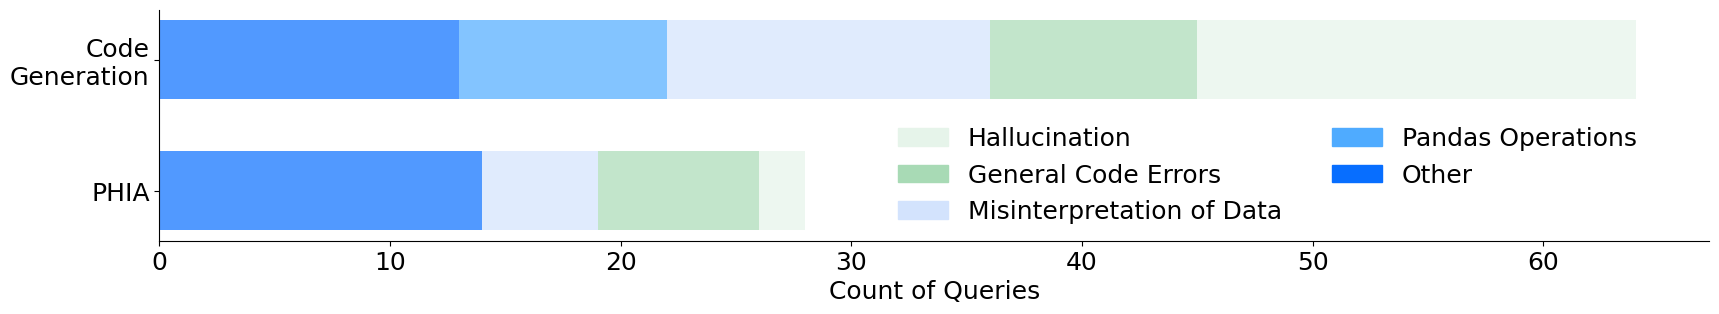

In [4]:
MEDIUM_SIZE = 18
mpl.rcParams.update({'font.size': MEDIUM_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'axes.titlesize': MEDIUM_SIZE})
import seaborn as sns
import matplotlib.pyplot as plt

# Define the elegant palette using seaborn's color palette function
# elegant_palette = sns.color_palette('Blues', n_colors=len(error_df["Error Category"].unique()))
# elegant_palette = sns.color_palette("Blues", n_colors=5)
elegant_palette = [ '#e6f4ea', '#a8dab5', '#D3E3FD','#4FABFF','#076EFF']
fig, ax = plt.subplots(figsize=(20, 3))

# Generate the histogram plot
sns.histplot(
    data=error_df,
    y="name",
    hue="Error Category",
    multiple="stack",
    stat="count",
    shrink=0.6,
    alpha=0.7,
    palette=elegant_palette,  # Use the custom color palette
    edgecolor=None
)

# Get unique categories for the legend
unique_categories = error_df["Error Category"].unique().tolist()

# Map each unique category to its color in the palette
# Ensuring we have a color for each category
category_colors = {
    category: color
    for category, color in zip(unique_categories, elegant_palette)
}

# Create custom handles for the legend
handles = [
    plt.Rectangle((0, 0), 1, 1, color=category_colors[category])
    for category in unique_categories
]

# Use the unique categories as labels
labels = unique_categories

# Create a new legend with 3 columns and adjust its location
ax.legend(handles, labels, ncol=2, frameon=False, loc=(0.47, 0.03))  # Adjust the tuple values as needed

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("")
plt.xlabel('Count of Queries')

ax = plt.gca()
ax.set_yticklabels(['Code\nGeneration', 'PHIA'])

plt.savefig("./figs/5.pdf", bbox_inches='tight', format="pdf")
plt.show()
